**In this notebook, I will be loading all the movie data into a dataframe, examining and cleaning it, preparing it for machine learning, and looking for interesting findings.**

In [4]:
import json
import pandas as pd
import pickle
import sklearn 
from sklearn.preprocessing import FunctionTransformer
from itertools import chain
from sklearn.linear_model import ElasticNetCV
%matplotlib inline

In [ ]:
#loading the basic movie information all of which was scraped into a json file
with open('movies_dem.json') as json_data:
    data = json.load(json_data)



In [394]:
new_dict = dict(chain.from_iterable(d.items() for d in (data)))


In [395]:
fixed_dict = {}
for keys, values in new_dict.items():
    #we don't want movies with a lot of missing values
    if len(values) > 3:
        fixed_dict[keys] = values
        

In [396]:
df = pd.DataFrame(fixed_dict)
df = df.transpose()
df.head()

,0,1,2,3,4,5
(500) Days of Summer,Romance,1 hrs. 35 min.,PG-13,$7.5 million,Fox Searchlight,"July 17, 2009"
* batteries not included,Sci-Fi Fantasy,1 hrs. 46 min.,PG,N/A,Universal,"December 18, 1987"
10 Cloverfield Lane,Thriller,1 hrs. 45 min.,PG-13,N/A,Paramount,"March 11, 2016"
10 Things I Hate About You,Romantic Comedy,1 hrs. 37 min.,PG-13,$30 million,Buena Vista,"March 31, 1999"
10 to Midnight,Unknown,1 hrs. 43 min.,R,N/A,MGM,"March 11, 1983"


In [366]:
df.shape

(5393, 7)

In [409]:
#because there were two pages to scrape to get all the movie data, the data was seperated into two JSON files
with open('movies_num.json') as json_data:
    data = json.load(json_data)

new_dict2 = dict(chain.from_iterable(d.items() for d in (data)))


fixed_dict2= {}
for keys, values in new_dict2.items():
    if type(values) == list:
        fixed_dict2[keys] = values
      

In [369]:
#removing movies in which I could not get information
errors_gross = []
for keys, values in movies_gross_dict.items():
    if type(values) != list:
        errors_gross.append(keys)
for error in errors_gross:
    del movies_gross_dict[error]
len(movies_gross_dict)

4844

In [ ]:
df.columns = [int(x) for x in df.columns]
df.rename(columns = {0: "Genre", 1: "Runtime", 2: "Rating", 3: "Budget", 4: "Studio", 5: "Release Date"}, inplace=True)




In [410]:
df2 = pd.DataFrame(fixed_dict2)
df2= df2.transpose()


In [411]:
df2.columns = [int(x) for x in df2.columns]
df2.rename(columns = {0: "week1rank", 1: "week1gross", 2: "week1theatercount", 3: "week2rank", 4: "week2gross", 5: "grosschange", 6:"week2theatercount"}, inplace=True)


movies = pd.DataFrame.join(df,df2, how="outer")


In [412]:
movies

,Genre,Runtime,Rating,Budget,Studio,Release Date,week1rank,week1gross,week1theatercount,week2rank,week2gross,grosschange,week2theatercount
(500) Days of Summer,Romance,1 hrs. 35 min.,PG-13,$7.5 million,Fox Searchlight,"July 17, 2009",11,"$1,592,900",27,12,"$3,127,100",+96.3%,85
* batteries not included,Sci-Fi Fantasy,1 hrs. 46 min.,PG,N/A,Universal,"December 18, 1987",4,"$13,014,700","1,328",5,"$19,423,300",+49.2%,"1,357"
10 Cloverfield Lane,Thriller,1 hrs. 45 min.,PG-13,N/A,Paramount,"March 11, 2016",2,"$32,943,200","3,391",4,"$17,475,600",-47.0%,"3,427"
10 Things I Hate About You,Romantic Comedy,1 hrs. 37 min.,PG-13,$30 million,Buena Vista,"March 31, 1999",11,"$5,432,700",-,2,"$20,759,300",+282%,"2,271"
10 to Midnight,Unknown,1 hrs. 43 min.,R,N/A,MGM,"March 11, 1983",2,"$10,285,300",595,4,"$6,191,400",-39.8%,595
"10,000 B.C.",Period Adventure,1 hrs. 49 min.,PG-13,$105 million,Warner Bros.,"March 7, 2008",1,"$53,977,100","3,410",2,"$27,303,100",-49.4%,"3,410"
101 Dalmatians (1996),Family Comedy,1 hrs. 43 min.,G,N/A,Buena Vista,"November 27, 1996",5,"$22,641,600","2,794",1,"$74,713,100",+230%,"2,794"
102 Dalmatians,Family Comedy,1 hrs. 44 min.,G,$85 million,Buena Vista,"November 22, 2000",11,"$10,195,000","2,704",3,"$35,234,800",+246%,"2,704"
12 Monkeys,Sci-Fi,2 hrs. 10 min.,R,N/A,Universal,"December 29, 1995",21,"$711,200",3,1,"$36,789,600","+5,073%","1,533"
12 Rounds,Action / Adventure,1 hrs. 48 min.,PG-13,N/A,Fox,"March 27, 2009",7,"$7,794,100","2,331",9,"$3,755,400",-51.8%,"2,331"


In [413]:
movies[movies.week1theatercount == "-"].shape

(151, 13)

In [414]:
#recreating the movie index
movies["Title"] = movies.index
movies.index = np.arange(len(movies.index))
movies = movies[["Title", "Genre", "Runtime", "Rating", "Budget", "Studio", "Release Date", "week1rank", "week1gross",
                 "week1theatercount", "week2rank", "week2gross", "grosschange", "week2theatercount" ]]


**Here I will be removing NAs and other bad data and cleaning up columns so we can do machine learning on them.**

In [416]:
#about 150 rows with NAs
#week 1 theater counter is important because I want to remove movies that were limited releases as I want to only
#look at wide release movies

movies_fixed = movies[(movies.week1theatercount != "-")]
movies_fixed = movies_fixed.dropna()
movies_fixed.shape


(4662, 14)

In [417]:
movies_fixed['week1theatercount'] = movies_fixed.week1theatercount.str.replace(",", "").astype(int)

In [418]:
movies_fixed = movies_fixed[movies_fixed.week1theatercount > 600]
movies_fixed.shape

(3809, 14)

Here we will be removing a lot of rows, but this is needed as budget is really important feature, and limited release
movies will skew the results.

In [425]:
movies_fixed = movies_fixed[movies_fixed.Budget != "N/A"]
movies_fixed.shape

(2124, 19)

In [429]:
movies_fixed["week1gross"]= movies_fixed["week1gross"].str.replace("$", "").str.replace(",", "").astype(int)


5        53977100
7        10195000
12       35079800
13       23927100
14       37440500
15        7457200
16       20781100
23       93106300
24       41251800
25        6927500
27       92889200
30       37868200
32       54337000
33       12837700
34       85617500
36       38247200
37       23647000
38       20871200
40       17170600
45       25922500
46       21202100
47      121060200
48       13969300
49       64337700
50       24390200
52       37193000
53       11086700
55       71472100
56       13069300
59       96916100
          ...    
4913     10167000
4915     21389700
4916    121726000
4917    118994500
4918     93310200
4919    134442700
4920     79303500
4921    186643400
4922    154415900
4923     92086200
4926     30735500
4929     39926800
4930     30253200
4931     12212200
4933     63116500
4934     25554900
4937     54109200
4938     42961400
4946     12940400
4947      9257600
4948      9943700
4950     17363100
4952     20488600
4956     21315800
4957     3

In [431]:
movies_fixed["week2gross"]= movies_fixed["week2gross"].str.replace("$", "").str.replace(",", "").astype(int)



//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [445]:
movies_fixed.Runtime.value_counts()

1 hrs. 40 min.    88
1 hrs. 35 min.    80
1 hrs. 30 min.    73
1 hrs. 45 min.    62
1 hrs. 50 min.    58
1 hrs. 47 min.    55
1 hrs. 37 min.    55
1 hrs. 42 min.    52
1 hrs. 36 min.    52
1 hrs. 38 min.    50
1 hrs. 41 min.    46
1 hrs. 44 min.    46
1 hrs. 31 min.    45
1 hrs. 39 min.    44
1 hrs. 53 min.    43
2 hrs. 0 min.     43
1 hrs. 48 min.    42
1 hrs. 34 min.    42
1 hrs. 43 min.    41
1 hrs. 46 min.    41
1 hrs. 28 min.    41
1 hrs. 32 min.    38
1 hrs. 57 min.    38
1 hrs. 49 min.    37
1 hrs. 29 min.    36
1 hrs. 33 min.    36
1 hrs. 54 min.    35
1 hrs. 51 min.    35
1 hrs. 56 min.    34
1 hrs. 55 min.    33
                  ..
2 hrs. 38 min.     2
2 hrs. 42 min.     2
1 hrs. 10 min.     2
2 hrs. 52 min.     1
3 hrs. 1 min.      1
2 hrs. 46 min.     1
2 hrs. 59 min.     1
1 hrs. 3 min.      1
2 hrs. 50 min.     1
3 hrs. 8 min.      1
2 hrs. 41 min.     1
3 hrs. 10 min.     1
1 hrs. 8 min.      1
2 hrs. 39 min.     1
2 hrs. 58 min.     1
3 hrs. 30 min.     1
2 hrs. 44 min

In [446]:
movies_fixed = movies_fixed[movies_fixed.Runtime != "N/A"]
#putting the runtimes in minutes
def fix_runtime(row):
    hours_to_min = 60 * int(row.split(" ")[0])
    mins = int(row.split(" ")[2])
    new_runtime = mins + hours_to_min
    return new_runtime
movies_fixed["fixed_runtime"] = movies_fixed["Runtime"].apply(lambda x: fix_runtime(x))    

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [456]:
movies_fixed["fixed_runtime"].describe()

count    2123.000000
mean      108.274140
std        18.298067
min        63.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       210.000000
Name: fixed_runtime, dtype: float64

In [459]:
movies_fixed["Runtime"] = movies_fixed["fixed_runtime"]
movies_fixed = movies_fixed.drop('fixed_runtime', 1)


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [461]:
movies_fixed.grosschange.sort_values()

4110      +0.2%
4382    +1,104%
2789    +1,109%
2075    +1,112%
3308    +1,239%
4527    +1,357%
3117    +1,600%
234       +1.1%
3724      +1.2%
1092      +1.4%
3685      +1.8%
1452     +10.1%
3761     +10.2%
1313      +104%
193       +106%
4090      +107%
2348      +109%
3573      +109%
3273     +11.1%
1018      +110%
2126      +112%
2600      +114%
4254      +115%
4493      +116%
382       +116%
1563      +119%
196      +12.0%
4840     +12.2%
4330     +12.9%
1592      +120%
         ...   
4326      -7.7%
1033      -7.7%
812      -70.0%
1082     -70.1%
4730     -70.7%
4444     -70.9%
4443     -71.4%
4274     -71.7%
1305     -72.0%
2627     -72.3%
4446     -72.4%
3166     -72.5%
3803     -73.2%
3719     -75.0%
2670     -76.9%
1493     -78.5%
1414     -79.2%
2974      -8.1%
1709      -8.2%
4526      -8.2%
4846      -8.3%
1505      -8.6%
3333      -8.8%
4802      -8.9%
1980      -9.0%
4331      -9.0%
4930      -9.5%
3179      -9.6%
516       -9.7%
4367      -9.7%
Name: grosschange, dtype

In [477]:
#turn the string gross change percent into a float
def fix_grosschange(row):
    row = row.replace("%", "")
    row = row.replace("+", "")
    row = row.replace(",", "")
    if row == "-":
        row = 0
    percent = float(row) /100
    return percent
movies_fixed["grosschange_fix"] = movies_fixed["grosschange"].apply(lambda x: fix_grosschange(x))

In [478]:
movies_fixed[["grosschange", "grosschange_fix"]].head()



,grosschange,grosschange_fix
5,-49.4%,-0.494
7,+246%,2.460
12,-52.8%,-0.528
13,-45.9%,-0.459
14,-43.3%,-0.433


In [479]:
movies_fixed["grosschange"] = movies_fixed["grosschange_fix"]
movies_fixed = movies_fixed.drop('grosschange_fix', 1)



In [483]:
#putting the release date in datetime format
movies_fixed["Release Date Fix"] = pd.to_datetime(movies_fixed["Release Date"])
movies_fixed["Release Date Fix"].head()

5    2008-03-07
7    2000-11-22
12   2004-04-23
13   2016-01-15
14   2007-06-22
Name: Release Date Fix, dtype: datetime64[ns]

In [ ]:
movies_fixed["Release Date"] = movies_fixed["Release Date Fix"]
movies_fixed = movies_fixed.drop('Release Date Fix', 1)


In [510]:
movies_fixed["week1rank"] = movies_fixed["week1rank"].astype(int)
movies_fixed["week2rank"] = movies_fixed["week2rank"].astype(int)
movies_fixed.dtypes

Title                        object
Genre                        object
Runtime                       int64
Rating                       object
Budget                       object
Studio                       object
Release Date         datetime64[ns]
week1rank                     int64
week1gross                    int64
week1theatercount             int64
week2rank                     int64
week2gross                    int64
grosschange                 float64
week2theatercount            object
Director                    float64
Release check               float64
imdbRating                  float64
Metascore                   float64
Rotten_score                float64
dtype: object

In [511]:
#forgot to fix week2 theater count as I did week 1 theater count
movies_fixed['week2theatercount'] = movies_fixed.week2theatercount.str.replace(",", "").astype(int)


In [518]:
# cleaning budget will be a bit hard as most budgets have million in them..but these do not
movies_fixed[~movies_fixed["Budget"].str.contains("million")]

,Title,Genre,Runtime,Rating,Budget,Studio,Release Date,week1rank,week1gross,week1theatercount,week2rank,week2gross,grosschange,week2theatercount,Director,Release check,imdbRating,Metascore,Rotten_score
317,Aqua Teen Hunger Force Colon Movie Film for Th...,Animation,87,R,"$750,000",First Look,2007-04-13,14,4753700,877,19,1532600,-0.678,877,NaN,NaN,NaN,NaN,NaN
906,Cry Wolf,Horror,90,PG-13,"$1,000,000",Rogue Pictures,2005-09-16,5,7105500,1789,10,3699700,-0.479,1787,NaN,NaN,NaN,NaN,NaN
1324,Fireproof,Drama,122,PG,"$500,000",Samuel Goldwyn,2008-09-26,4,10147100,839,8,6399600,-0.369,852,NaN,NaN,NaN,NaN,NaN
3803,The Devil Inside,Horror,87,R,"$1,000,000",Paramount,2012-01-06,1,41881300,2285,6,11221300,-0.732,2551,NaN,NaN,NaN,NaN,NaN
3882,The Gallows,Horror,81,R,"$100,000",Warner Bros. (New Line),2015-07-10,6,14680500,2720,8,6472400,-0.559,2720,NaN,NaN,NaN,NaN,NaN
4706,Unfriended,Horror,83,R,"$1,000,000",Universal,2015-04-17,3,19001600,2739,5,7665300,-0.597,2775,NaN,NaN,NaN,NaN,NaN


In [545]:
def fix_budget(row):
    row = row.replace("$", "").replace(",", "")
    if "million" in row and "." not in row:
        row = row.replace(" million", "000000")
    if "." in row:
        row = (int(row.split(".")[0]) + 1) * 1000000
    return int(row)

In [546]:
movies_fixed["budget_fix"] = movies_fixed.Budget.apply(lambda x: fix_budget(x))

In [551]:
movies_fixed.budget_fix.describe()

count    2.123000e+03
mean     5.537699e+07
std      4.701009e+07
min      1.000000e+05
25%      2.200000e+07
50%      4.000000e+07
75%      7.500000e+07
max      3.000000e+08
Name: budget_fix, dtype: float64

In [553]:
movies_fixed["Budget"] = movies_fixed["budget_fix"]
movies_fixed = movies_fixed.drop('budget_fix', 1)

Here I will be creating columns and  adding in new information, like critic review scores, from OMDB API.
The release check column is there so I can compare results to what I currently have to avoid movies with the same title like remakes.

In [ ]:
movies_fixed["Director"] = np.NaN
movies_fixed["Release check"] = np.NaN
movies_fixed["imdbRating"] = np.NaN
movies_fixed["Metascore"] = np.NaN
movies_fixed["Rotten_score"] = np.NaN

In [702]:
def add_api_data(dataframe):
    for x,y in enumerate(dataframe["Title"]):
        y = y.split("(")[0]
        url = "http://www.omdbapi.com/?t={}".format(y.replace(" ", "+"))
        response = requests.get(url).text
        response_load = json.loads(response)
        try:
            dataframe.loc[x, "Director"] = response_load["Director"]
            dataframe.loc[x,"Release check"]= response_load["Released"]
            dataframe.loc[x, "Metascore"] = response_load["Metascore"]
            dataframe.loc[x,"imdbRating"] = response_load["imdbRating"]
            try:
                dataframe.loc[x,"Rotten_score"] = response_load["Ratings"][1]["Value"]
                if "/" in dataframe.loc[x,"Rotten_score"]:
                    dataframe.loc[x,"Rotten_score"] = np.NaN 
                    
            except:
                dataframe.loc[x,"Rotten_score"] = np.NaN 
            
        except:
            continue 
        

In [848]:
#calling this df something better :)
full_movies = movies_fixed.copy(deep=True)

In [849]:
full_movies = full_movies.reset_index(drop=True)

In [707]:
add_api_data(full_movies)

In [711]:
full_movies.shape

(2123, 19)

In [713]:
full_movies.dropna(inplace=True)
full_movies.shape

(1989, 19)

In [720]:
#let's save this DF
with open("movie_data.pkl", "wb") as data:
    pickle.dump(full_movies, data)


In [5]:

with open("movie_data.pkl", "rb") as data:
    movies = pickle.load(data)
movies.head()

,Title,Genre,Runtime,Rating,Budget,Studio,Release Date,week1rank,week1gross,week1theatercount,week2rank,week2gross,grosschange,week2theatercount,Director,Release check,imdbRating,Metascore,Rotten_score
1,102 Dalmatians,Family Comedy,104,G,85000000,Buena Vista,2000-11-22,11,10195000,2704,3,35234800,2.460,2704,Kevin Lima,22 Nov 2000,4.8,35,31%
2,13 Going on 30,Fantasy Comedy,97,PG-13,37000000,Sony (Revolution),2004-04-23,2,35079800,3438,3,16546200,-0.528,3453,Gary Winick,23 Apr 2004,6.1,57,64%
4,1408,Horror,94,PG-13,25000000,MGM (Weinstein),2007-06-22,2,37440500,2678,5,21210200,-0.433,2631,Mikael Håfström,22 Jun 2007,6.8,64,79%
5,1492: Conquest of Paradise,Historical Drama,148,PG-13,47000000,Paramount,1992-10-09,6,7457200,1008,9,3613600,-0.515,1008,Ridley Scott,09 Oct 1992,6.5,N/A,39%
6,15 Minutes,Thriller,120,R,60000000,New Line,2001-03-09,2,20781100,2337,5,8937900,-0.570,2337,John Herzfeld,09 Mar 2001,6.1,34,33%


All looks mostly good, but we still need to do a couple of checks and fixes.

In [6]:
#we need to make this column a float
def fix_rotten_score(row):
    row = row.replace("%", "")
    return int(row) / 100
movies["Rotten_score"] = movies["Rotten_score"].apply(lambda x: fix_rotten_score(x))
movies.Rotten_score.head()

1    0.31
2    0.64
4    0.79
5    0.39
6    0.33
Name: Rotten_score, dtype: float64

In [7]:
movies["Release check_test"] = pd.to_datetime(movies["Release check"])

Comparing release date pulled from api to that of box office mojo...deleting rows where difference is over 14 days to make sure correct review information was pulled in.

In [8]:
#compared release date pulled from api to that of box office mojo...deleting rows where difference is over 14 days 
movies = movies[(movies["Release check_test"] - movies["Release Date"]) < "14 days"]
movies.shape

(1973, 20)

In [824]:
#comparing the bottom 1900 to the top 200 in gross change:
full_movies.loc[full_movies["grosschange"].nsmallest(1910).index].grosschange.mean()

-0.6341349999999997

In [825]:
full_movies.loc[full_movies["grosschange"].nlargest(200).index].grosschange.mean()

5.091749999999998

How is the mean of the top 200 movies by grosschange around 5? Meaning that between week1 and week2 there was a fivefold increase in box office gross !?!? I ended up figuring this out towards the end of the notebook.

In [9]:
#removing movies with a huge switch in theater count between week 1 and week 2 --to avoid limited release movies.
movies = movies[abs(movies["week1theatercount"] - movies["week2theatercount"]) < 1000]
movies.shape

(1956, 20)

In [11]:
#fixing some issues with the Metascore colummn
movies = movies[movies.Metascore != "N/A"]
movies["Metascore"] = movies.Metascore.astype(int)
movies.shape

(1839, 20)

In [12]:
#fixing issues with imdb column and making a Season feature
movies["imdbRating"] = movies["imdbRating"].astype(float)
movies["ReleaseDateMonth"] = movies["Release Date"].dt.month

movies["ReleaseDateMonth"].value_counts()
movies["Season"] = movies["ReleaseDateMonth"].replace({0: 1, 1: 1, 2: 1, 3: 1, 4:2, 5:2, 6:2, 7:3,8:3, 9:3, 10:4, 11:4, 12:4})

In [34]:
#don't need this anyomre
movies = movies.drop(["Release check_test", "Release check"], 1)
movies.shape

(1829, 20)

**From here to the rest of the notebook, I do some data visualization and checking of columns to look for any irregularities. I will also be removing columns I will not be fitting models on.**

In [35]:
# Looked at the top 10 extreme outliers..on boxofficemojo...all appear to be errors so I am removing them
movies = movies[movies.grosschange < 6.35]
movies.shape

(1829, 20)

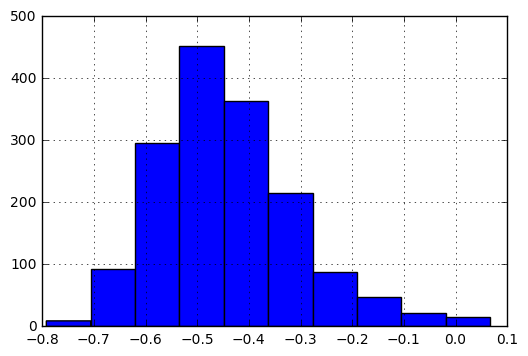

In [974]:
#this looks good, but we need to look at those outliers more.
movies.grosschange.nsmallest(1600).hist()

In [36]:
#making dummy variables for all the genre columns
#need to do this like below as some movies have multiple genres
columns = set(sum((movies
 .Genre
 .value_counts()
 .index
 .to_series()
 .apply(lambda x: x.replace('/',' ').split(' '))
 .values
 ), []))

columns = list(columns)[1:]

movies2 = movies.copy()
for col in columns:
    movies2[col] = 0
    mask = movies2.Genre.str.contains(col)
    movies2.loc[mask,col] = 1

In [38]:
movies_new["Dayofyear"] = movies_new["Release Date"].dt.dayofyear

In [39]:
#making a holiday column to label movies that were released on or right around a holiday
#Holidays included Christmas/New Years, Valentines Day/Presidents Day, Halloween, and Thanksgiving (biggest movie holidays) 
def is_holiday(row):
    holidays= [1, 43,44,45,46,47,48,49,50,51,52, 183,184,185,186, 302,303,304,305,322,323,324,325,326,327,
               328,329,330,331,332,333,334,357,358,359,360,361,362,363,364,365]
    if row in holidays:
        return 1
    else:
        return 0 
movies_new["is holiday"] = movies_new["Dayofyear"].apply(lambda x: is_holiday(x))
    

In [40]:
#Only one NC-17 rated movie
movies_new = movies_new[movies_new.Rating != "NC-17"]

Let's make some dummies for the season and rating columnns:

In [41]:
movies_new[["Season1", "Season2", "Season3", "Season4"]] = pd.get_dummies(movies_new["Season"], columns=["Season1", "Season2", "Season3", "Season4"])

In [42]:
movies_new[["G", "PG", "PG-13", "R"]] = pd.get_dummies(movies_new["Rating"], columns= ["G", "PG", "PG-13", "R"])

In [43]:
# removing movies where Studio has a frequency less than five
movies_final = (movies_new[movies_new.groupby('Studio').Studio.transform(len) >= 5])


In [44]:
movies_final = pd.get_dummies(movies_new["Studio"])

In [45]:
movies_final = movies_new.join(movies_final)

In [46]:
movies_final = movies_final.reset_index()

In [1060]:
movies_final.head()

,index,Title,Genre,Runtime,Rating,Budget,Studio,Release Date,week1rank,week1gross,...,TriStar,USA Films,United Artists,Universal,Vestron,Vivendi Entertainment,Warner Bros.,Warner Bros. (New Line),Weinstein / Dimension,Weinstein Company
0,1,102 Dalmatians,Family Comedy,104,G,85000000,Buena Vista,2000-11-22,11,10195000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,13 Going on 30,Fantasy Comedy,97,PG-13,37000000,Sony (Revolution),2004-04-23,2,35079800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1408,Horror,94,PG-13,25000000,MGM (Weinstein),2007-06-22,2,37440500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,15 Minutes,Thriller,120,R,60000000,New Line,2001-03-09,2,20781100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,2 Fast 2 Furious,Action,101,PG-13,76000000,Universal,2003-06-06,2,93106300,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
movies_final2 = movies_final.copy()


In [48]:
#dropping columns I won't be doing machine learning on
movies_final2 = movies_final2.drop(["index", "Dayofyear", "week1theatercount", "week2theatercount", "ReleaseDateMonth", "Release Date"], 1)

In [49]:
movies_learning = movies_final2.select_dtypes(exclude=["object"])
target = movies_learning.grosschange


In [50]:
movies_learning = movies_learning.drop("grosschange" , 1)

In [53]:
movies_learning.columns

Index(['Runtime', 'Budget', 'week1rank', 'week1gross', 'week2rank',
       'imdbRating', 'Metascore', 'Rotten_score', 'Release check_test',
       'Season', 'is holiday', 'Season1', 'Season2', 'Season3', 'Season4', 'G',
       'PG', 'PG-13', 'R', '8X Entertainment', 'Artisan', 'BH Tilt',
       'Broad Green Pictures', 'Buena Vista', 'CBS Films', 'Chicago Pictures',
       'Clarius Entertainment', 'Columbia', 'Destination', 'Dimension Films',
       'DreamWorks', 'FilmDistrict', 'First Look', 'Focus Features', 'Fox',
       'Fox Atomic', 'Fox Searchlight', 'Freestyle Releasing',
       'Galaxy International', 'Lions Gate', 'Lionsgate', 'Lionsgate/Summit',
       'MGM', 'MGM (Weinstein)', 'Miramax', 'New Line', 'Newmarket',
       'Open Road Films', 'Orion Pictures', 'Overture Films', 'Paramount',
       'Paramount (DreamWorks)', 'Paramount Vantage', 'Picturehouse',
       'PolyGram', 'Relativity', 'Roadside Attractions',
       'Rocky Mountain Pictures', 'Rogue Pictures', 'STX Entertain

Graphs like the below are to see if variables are normally distributed or close to that, and if I should scale variables or not.

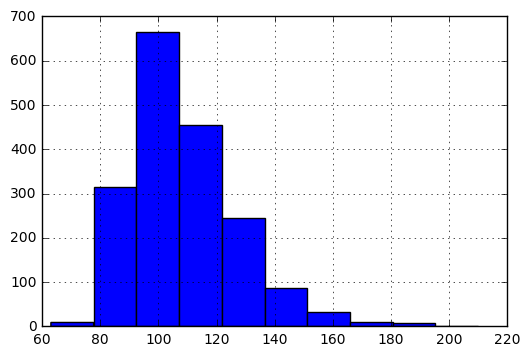

In [79]:
movies_final.Runtime.hist(bins=10)

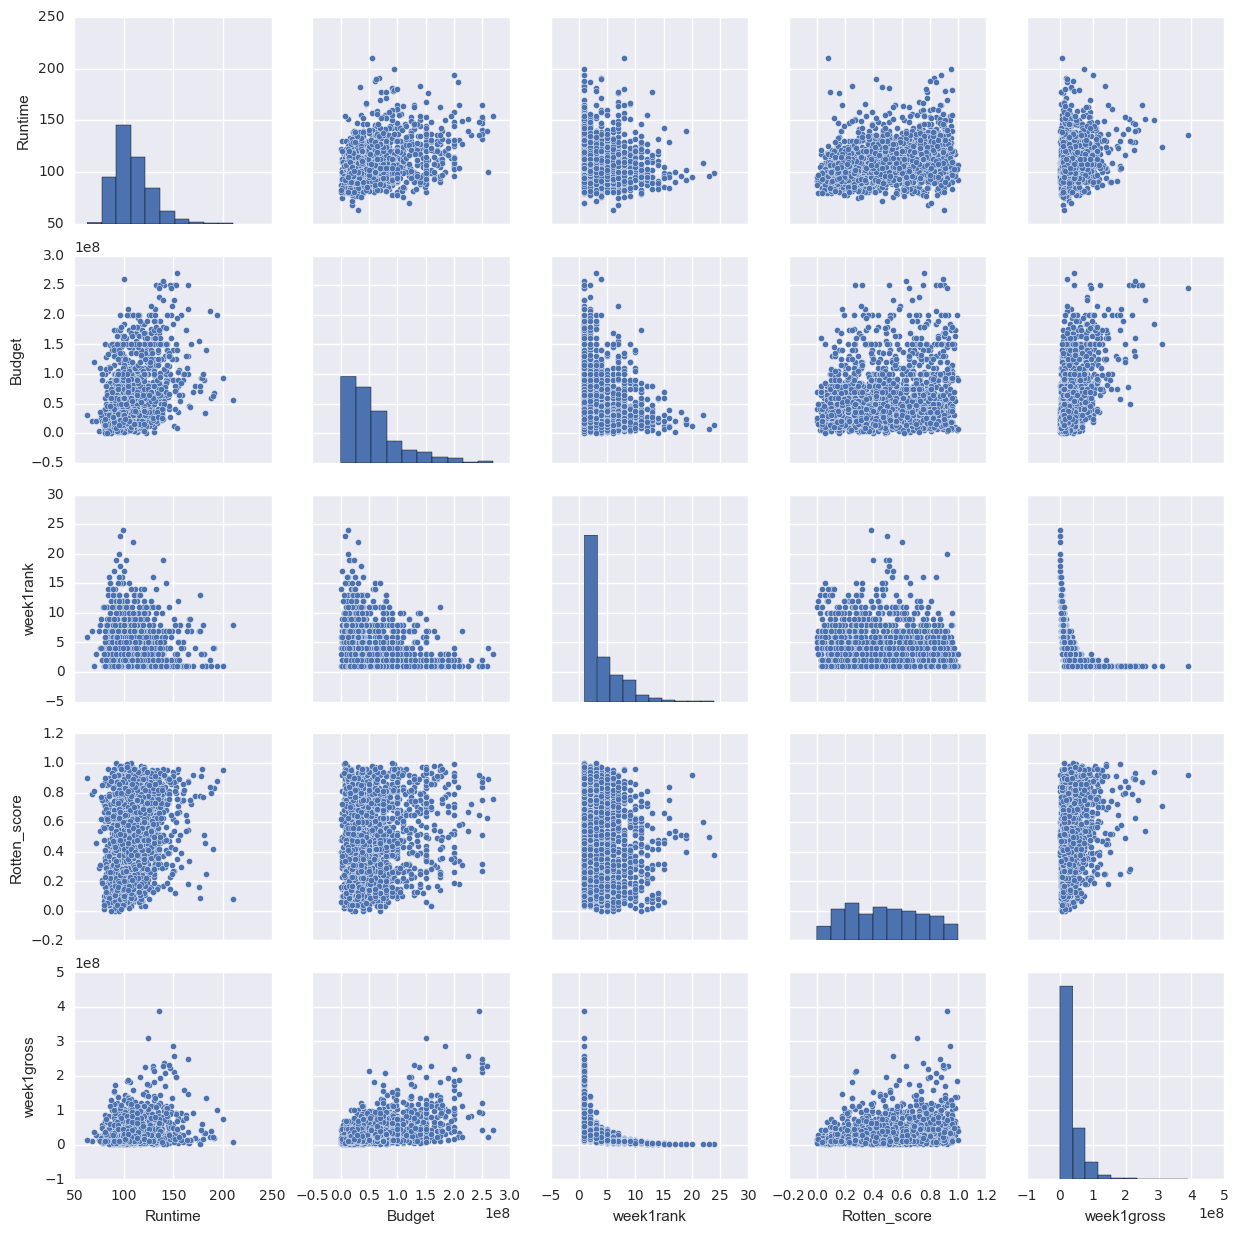

In [289]:
import seaborn as sns
sns.pairplot(movies_learning[["Runtime", "Budget", "week1rank", "Rotten_score", "week1gross"]])

Looks like there are some minor colinearities ike between week1gross and budget, but nothing too bad.

In [145]:
movies_learning.corr()

,Runtime,Budget,week1rank,week1gross,week2rank,imdbRating,Metascore,Rotten_score,is holiday,Season1,...,TriStar,USA Films,United Artists,Universal,Vestron,Vivendi Entertainment,Warner Bros.,Warner Bros. (New Line),Weinstein / Dimension,Weinstein Company
Runtime,1.000000,0.379912,-0.119383,0.257532,-0.218104,0.440148,0.328551,0.285695,0.083756,-0.074029,...,0.004720,-0.026296,-0.015539,0.024194,-0.004918,-0.032741,0.150254,-0.036844,-0.039790,0.003922
Budget,0.379912,1.000000,-0.268754,0.564470,-0.392833,0.199027,0.198836,0.166720,0.053040,-0.125724,...,-0.053018,-0.036244,-0.022619,0.005404,-0.024940,-0.018059,0.130723,-0.037136,-0.048372,-0.049222
week1rank,-0.119383,-0.268754,1.000000,-0.504449,0.678658,-0.180646,-0.168764,-0.198997,0.200237,-0.047110,...,-0.004256,0.063107,0.033104,-0.090957,0.001972,0.038387,-0.036224,-0.031882,0.002635,0.052335
week1gross,0.257532,0.564470,-0.504449,1.000000,-0.528611,0.263541,0.286969,0.289653,-0.030543,-0.090342,...,-0.039325,-0.034108,-0.027845,0.057012,-0.013927,-0.019481,0.059345,-0.014077,-0.030540,-0.045356
week2rank,-0.218104,-0.392833,0.678658,-0.528611,1.000000,-0.319395,-0.318798,-0.337528,-0.057694,0.075119,...,-0.019665,0.062180,0.027398,-0.060819,-0.014164,0.064476,-0.040261,-0.043103,0.051353,0.022395
imdbRating,0.440148,0.199027,-0.180646,0.263541,-0.319395,1.000000,0.743217,0.753711,0.058202,-0.105567,...,0.013953,-0.002992,0.008730,0.009358,0.013858,-0.047869,0.046586,-0.022254,-0.053588,0.029112
Metascore,0.328551,0.198836,-0.168764,0.286969,-0.318798,0.743217,1.000000,0.924072,0.016229,-0.177722,...,0.004264,0.011933,0.006233,0.035083,0.021352,-0.043019,0.014477,-0.033475,-0.020660,0.019174
Rotten_score,0.285695,0.166720,-0.198997,0.289653,-0.337528,0.753711,0.924072,1.000000,0.022352,-0.155687,...,0.011896,0.012982,-0.000282,0.027432,0.020560,-0.033442,-0.002694,-0.018430,-0.008047,0.015645
is holiday,0.083756,0.053040,0.200237,-0.030543,-0.057694,0.058202,0.016229,0.022352,1.000000,0.051342,...,-0.016032,0.012820,0.054642,-0.027089,-0.008654,-0.008654,0.005969,0.016813,-0.030068,0.083220
Season1,-0.074029,-0.125724,-0.047110,-0.090342,0.075119,-0.105567,-0.177722,-0.155687,0.051342,1.000000,...,-0.021261,-0.003509,0.002442,-0.007138,-0.012718,-0.012718,0.004500,-0.006108,0.004239,-0.032804


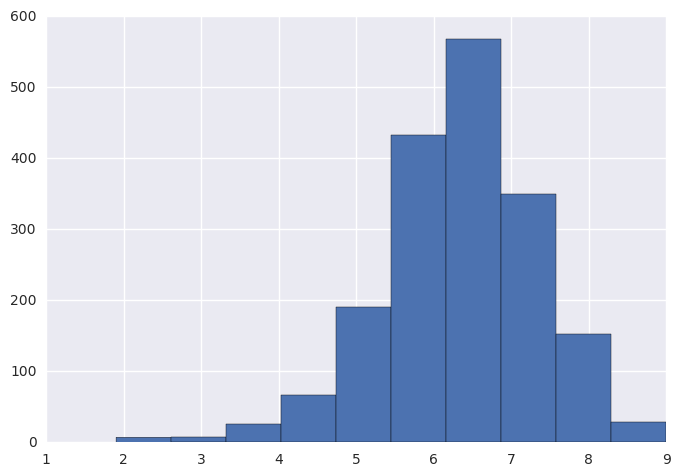

In [151]:
#intersting: IMDB rating don't average around 5, but around 6.5
movies_learning.imdbRating.hist()

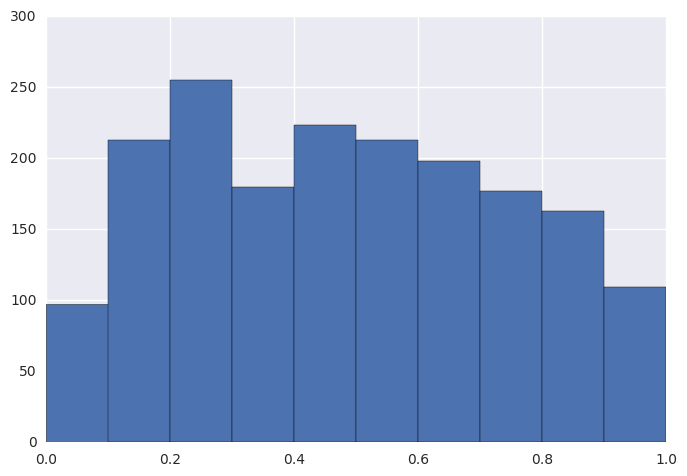

In [152]:
#much closer to a normal distribution than imdb ratings
movies_learning.Rotten_score.hist()

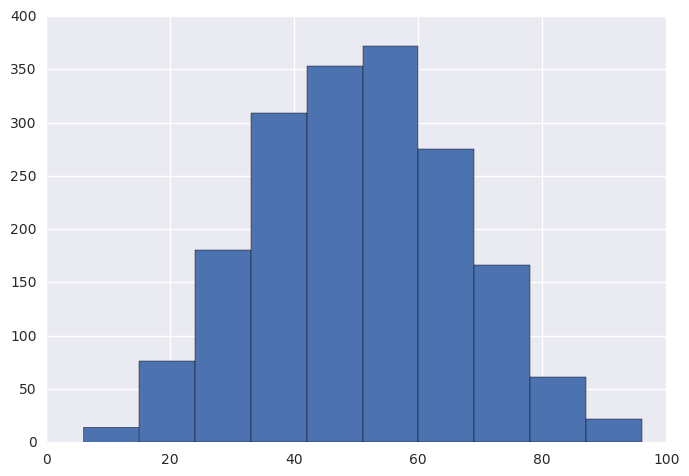

In [153]:
#I believe Metacritic tries to normalize their scores, explaining why the scores look normally distributed
movies_learning.Metascore.hist()

In [330]:
movies_final3_features = movies_final2.select_dtypes(exclude= ["object"])
movies_final3_target = movies_final3_features["grosschange"]
movies_final3_features = movies_final3_features.drop(["grosschange", "Release check_test", "week2rank"] ,1)
with open("movies_final3_features.pkl", "wb") as data:
    pickle.dump(movies_final3_features, data)

with open("movies_final3_target.pkl", "wb") as data:
    pickle.dump(movies_final3_target, data)

Here I'm going to look again at the massive outliers I have --with some movies have around fivefold increase in gross between week 1 and week 2.

In [348]:
movies_look =  movies_final[movies_final.columns[0:15]]

In [386]:
movies_look["dayofweek"] = movies_look["Release Date"].dt.weekday_name

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [366]:
len(movies_look[movies_look.grosschange > 1])

180

In [389]:
movies_look.dayofweek.value_counts()

Friday       1625
Wednesday     159
Thursday       30
Tuesday         6
Saturday        5
Sunday          2
Monday          1
Name: dayofweek, dtype: int64

There are a lot of Wednesday and Thursday movies....Wait what day does BoxOfficeMojo start it's week on?

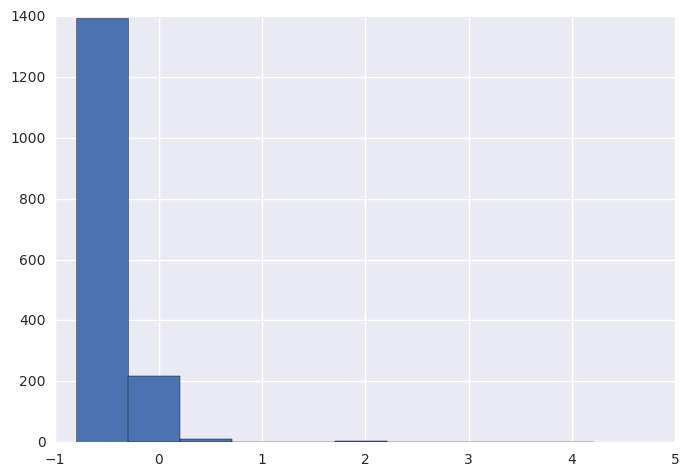

In [392]:
movies_look[movies_look.dayofweek == "Friday"].grosschange.hist()

OH!!! There are almost no outliers with a Friday start date...In fact, I went back to BoxOfficeMojo.com and found that they start their week on Fridays..so if movies were released Wednesday and Thursday that would be considered Day 1 (and maybe Day 2) and then the upcoming Friday would be day 1. Scary....let's get rid of those rows.

In [400]:
movies_final["dayofweek"] = movies_final["Release Date"].dt.weekday_name

In [408]:
movies_finalF = movies_final[(movies_final["dayofweek"] != "Wednesday") &(movies_final["dayofweek"] != "Thursday") ]

In [409]:
movies_finalF["dayofweek"].value_counts()

Friday      1625
Tuesday        6
Saturday       5
Sunday         2
Monday         1
Name: dayofweek, dtype: int64

In [421]:
movies_finalF[movies_finalF.grosschange >.2]

,index,Title,Genre,Runtime,Rating,Budget,Studio,Release Date,week1rank,week1gross,...,USA Films,United Artists,Universal,Vestron,Vivendi Entertainment,Warner Bros.,Warner Bros. (New Line),Weinstein / Dimension,Weinstein Company,dayofweek
28,32,A Bug's Life,Animation,96,G,120000000,Buena Vista,1998-11-20,4,23706200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Friday
76,87,All the Pretty Horses,Western,117,PG-13,57000000,Miramax,2000-12-25,14,6702500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Monday
106,119,Anna and the King,Period Drama,148,PG-13,92000000,Fox,1999-12-17,6,14825700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Friday
125,139,As Good as It Gets,Romantic Comedy,139,PG-13,50000000,Sony / Columbia,1997-12-23,10,6705100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday
368,417,Django Unchained,Western,165,R,100000000,Weinstein Company,2012-12-25,3,35803800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Tuesday
501,579,Frozen,Animation,108,PG,150000000,Buena Vista,2013-11-22,2,27495500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Friday
713,834,Jumanji,Family Adventure,104,PG,65000000,Sony / Columbia,1995-12-15,2,34007900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Friday
959,1128,Parental Guidance,Comedy,104,PG,25000000,Fox,2012-12-25,6,15891000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday
976,1149,Philomena,Drama,95,PG-13,12000000,Weinstein Company,2013-11-22,20,996000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Friday
1028,1209,Rain Man,Drama,133,R,25000000,MGM,1988-12-16,2,24076500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Friday


We are down to 22 movies with over .2 grosschange...much better!

In [441]:
movies_finalFF2 = movies_finalFF2.reset_index()

In [453]:
with open('movies_newest_features.pkl', "wb") as data:
    data = pickle.dump(movies_finalFF2_features,data)

In [454]:
with open('movies_newest_target.pkl', "wb") as data:
    data = pickle.dump(movies_finalFF2_target, data)

**From here to the bottom, I am going to look for some interesting findings between the highest and lowest gross changes.**

In [473]:
movies_finalFF[["Title", "grosschange", "Rotten_score", "imdbRating"]].nlargest(20, "grosschange").imdbRating.mean()

7.245

In [471]:
movies_finalFF[["Title", "grosschange", "Rotten_score", "imdbRating"]].nsmallest(20, "grosschange").imdbRating.mean()

5.67

Well first off we see that moviegoers rated the best gross change movies 1.5 points higher than the worst.

In [479]:
movies_finalFF[["Title", "grosschange", "Rotten_score", "imdbRating", "Genre", "Release Date"]].nsmallest(20, "grosschange")

,Title,grosschange,Rotten_score,imdbRating,Genre,Release Date
496,Friday the 13th (2009),-0.792,0.59,6.5,Horror,2009-02-13
931,One Direction: This is Us,-0.769,0.63,4.1,Concert,2013-08-30
1333,The Bye Bye Man,-0.750,0.23,3.8,Horror Thriller,2017-01-13
1365,The Devil Inside,-0.732,0.06,4.2,Horror,2012-01-06
1630,The Twilight Saga: New Moon,-0.724,0.28,4.6,Romance,2009-11-20
464,Fifty Shades of Grey,-0.720,0.25,4.1,Romance,2015-02-13
1559,The Purge,-0.717,0.37,5.7,Thriller,2013-06-07
1628,The Twilight Saga: Breaking Dawn Part 2,-0.709,0.49,5.5,Romance,2012-11-16
1731,Valentine's Day,-0.707,0.18,5.7,Romantic Comedy,2010-02-12
379,Doom,-0.701,0.19,5.2,Sci-Fi Horror,2005-10-21


Intersting to note that there are a lot of horror and romance movies on here and many that were absolutely panned by the critics. Many of these movies (including horror) were also released around Valentine's Day. Maybe the "fans" of these movies were seeing them first day, and then no one saw them after--like One Direction's concert movie?

In [481]:
movies_finalFF[["Title", "grosschange", "Rotten_score", "imdbRating", "Genre", "Release Date", "Rating"]].nlargest(20, "grosschange")

,Title,grosschange,Rotten_score,imdbRating,Genre,Release Date,Rating
125,As Good as It Gets,6.010,0.86,7.7,Romantic Comedy,1997-12-23,PG-13
976,Philomena,4.210,0.92,7.6,Drama,2013-11-22,PG-13
28,A Bug's Life,2.010,0.92,7.2,Animation,1998-11-20,G
501,Frozen,1.870,0.89,7.5,Animation,2013-11-22,PG
1678,Toy Story 2,1.860,1.00,7.9,Animation,1999-11-19,G
959,Parental Guidance,0.883,0.17,6.1,Comedy,2012-12-25,PG
1673,Tootsie,0.694,0.89,7.4,Comedy,1982-12-17,PG
1423,The Hateful Eight,0.633,0.75,7.8,Western,2015-12-25,R
368,Django Unchained,0.589,0.88,8.4,Western,2012-12-25,R
76,All the Pretty Horses,0.475,0.32,5.8,Western,2000-12-25,PG-13


In the best gross change movies, we see much less romance and horror movies--and the ones we do have are much higher rated. Even more importly, almost all of these movies were released on or near a holiday (mainly Christmas and Thanksgiving). Christmas especially makes sense, as people were probably seeing this movies a lot around New Years too. One must wonder if we have some non-linear relationships here. For the top 20, being around a holiday is good, while for the bottom 20 being around a holiday is bad. Also for the bottom 20, being a horror or romance movie and having a bad critic/moviegoer rating was bad, while for the top 20 being either a horror or romance movie and having a high critic rating/moviegoer rating was good. I hope to explore this more later.

In [485]:
len(movies_finalFF[movies_finalFF["Genre"] == "Horror"])
#about 7% of the dataset, but around 40% of the worst gross change movies

121

In [ ]:
movies_finalFF["is holiday"].value_counts()
#counts: holiday movies about 139 of the ~1800 dataset
#holiday movies are only around 8% of the dataset, but very overrepresented in the best and worst gross change movies.

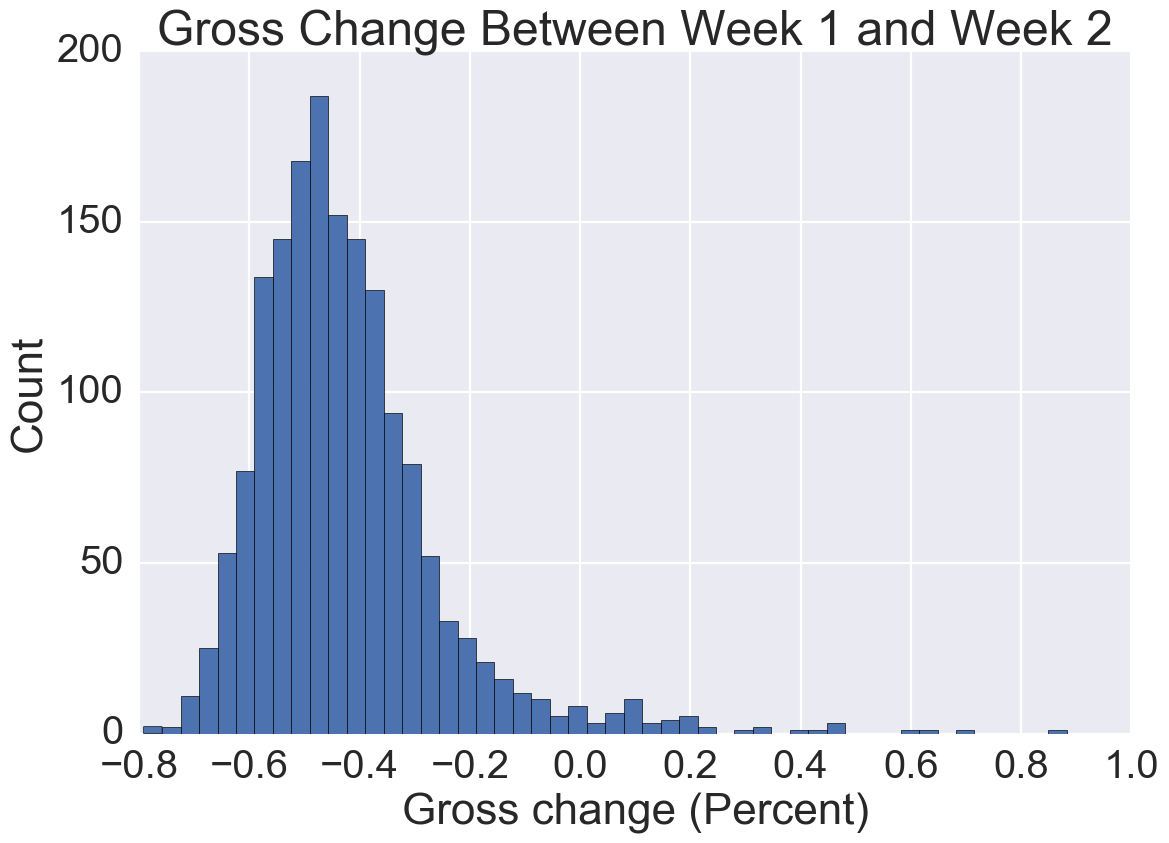

In [525]:
#making a graph for my presentaiton showing a histogram of gross change
movies_finalFF[movies_finalFF.grosschange < 1].grosschange.hist(bins=50)
plt.xlabel("Gross change (Percent)")
plt.ylabel("Count")
plt.title("Gross Change Between Week 1 and Week 2")
sns.set_context("poster", font_scale=2.2)
ax = plt.axes()


fig = ax.get_figure()
fig.savefig("GrossChange")
